In [1]:
import math
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import accuracy_score
TRAIN_DATA_PATH = 'AER_G_dataset-PTC_training2.csv'
TEST_DATA_PATH = 'AER_G_dataset-PTC_test2.csv'
TARGET_NAME = 'Diameter(mm)'

In [2]:
# x_train = features, y_train = target
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)
x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

In [3]:
"""
  Standard Scale test and train data
  Z - Score normalization
  """
def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
    return x_train_scaled, x_test_scaled
x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

In [4]:
hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.01
# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

In [11]:
%%time
# loss function
#msle = MeanSquaredLogarithmicError()
msle = MeanSquaredError()
model.compile(
    loss=msle, 
    optimizer=Adam(learning_rate=learning_rate), 
    metrics=[msle]
)
# train the model
history = model.fit(
    x_train_scaled.values, 
    y_train.values, 
    epochs=100, 
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
2/2 [==============================] - 1s 256ms/step - loss: 399.0349 - mean_squared_error: 444.6139 - val_loss: 50.9925 - val_mean_squared_error: 50.9925
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 61.8730 - mean_squared_error: 65.5894 - val_loss: 2744.6733 - val_mean_squared_error: 2744.6733
Epoch 3/100
2/2 [==============================] - 0s 35ms/step - loss: 266.4524 - mean_squared_error: 274.7343 - val_loss: 4215.0527 - val_mean_squared_error: 4215.0527
Epoch 4/100
2/2 [==============================] - 0s 37ms/step - loss: 340.8801 - mean_squared_error: 343.3661 - val_loss: 4384.3457 - val_mean_squared_error: 4384.3457
Epoch 5/100
2/2 [==============================] - 0s 29ms/step - loss: 308.5755 - mean_squared_error: 308.0707 - val_loss: 3798.4573 - val_mean_squared_error: 3798.4573
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 220.5562 - mean_squared_error: 223.9683 - val_loss: 2641.3972 - val_mean_squared_er

Epoch 100/100
2/2 [==============================] - 0s 34ms/step - loss: 3.2781 - mean_squared_error: 3.2285 - val_loss: 163.0296 - val_mean_squared_error: 163.0296
CPU times: total: 2.8 s
Wall time: 5.21 s


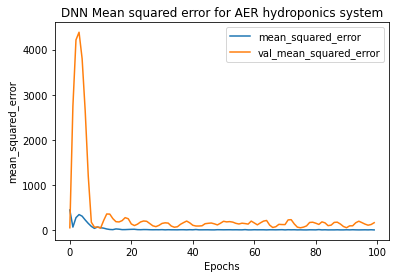

In [12]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.title('DNN Loss and validationMean squared error for AER hydroponics system')
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
#plot_history(history, 'mean_squared_logarithmic_error')
plot_history(history, 'mean_squared_error')

In [13]:
x_test['prediction'] = model.predict(x_test_scaled)

1/1 [==============================] - 0s 83ms/step


In [14]:
x_test['prediction']

0     63.313976
1     65.204330
2     66.558105
3     68.141136
4     69.426376
5     70.952972
6     72.313957
7     73.463577
8     75.611061
9     77.772263
10    78.561432
11    79.815300
12    84.807159
13    86.268791
14    87.996811
15    89.584579
16    90.437302
17    92.058296
Name: prediction, dtype: float32

In [15]:
#accuracy =[]
#score = model.accuracy(X_test,y_test) 
#accuracy.append(score)

In [10]:
model.

SyntaxError: invalid syntax (1068564517.py, line 1)